<a href="https://colab.research.google.com/github/SS524/Data-Science/blob/main/Deep%20Learning/Computer%20Vision/Multiclass%20Classification/Food_Vision/Food_Vision_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-741aaf3a-4bde-384c-ee2f-4e4769de3710)


In [3]:
## Get helper functions

In [4]:
!wget https://raw.githubusercontent.com/SS524/Data-Science/main/Deep%20Learning/Computer%20Vision/Multiclass%20Classification/Food_Vision/Extras/helper_function.py

--2021-08-29 13:12:28--  https://raw.githubusercontent.com/SS524/Data-Science/main/Deep%20Learning/Computer%20Vision/Multiclass%20Classification/Food_Vision/Extras/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4142 (4.0K) [text/plain]
Saving to: ‘helper_function.py’

helper_function.py  100%[===================>]   4.04K  --.-KB/s    in 0s      

2021-08-29 13:12:28 (47.1 MB/s) - ‘helper_function.py’ saved [4142/4142]



In [5]:
# import series of helper functions

In [6]:
from helper_function import plot_loss_curves,compare_historys

In [7]:
 # use tensorflow dataset to download

In [8]:
import tensorflow_datasets as tfds

In [9]:
datasets_list=tfds.list_builders()
print('food101' in datasets_list)

True


In [10]:
# Load in the data

In [11]:
(train_data,test_data),ds_info=tfds.load(name='food101',split=['train','validation'],
                                         shuffle_files=True,
                                         as_supervised=True,
                                         with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteI73T9M/food101-train.tfrecord


  0%|          | 0/75750 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteI73T9M/food101-validation.tfrecord


  0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [12]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [13]:
# Get the class name

In [14]:
class_names=ds_info.features['label'].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [15]:
# Take one sample of the trained data

In [16]:
train_data_one_sample=train_data.take(1)

In [17]:
train_data_one_sample

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [18]:
#output info about our training sample

In [19]:
for image,label in train_data_one_sample:
  print(f"""
    Image shape:{image.shape} 
    Image datatype:{image.dtype}
    Target class from Food101 (tensor form):{label}
    Class name (str form):{class_names[label.numpy()]}
    """)


    Image shape:(512, 512, 3) 
    Image datatype:<dtype: 'uint8'>
    Target class from Food101 (tensor form):24
    Class name (str form):clam_chowder
    


In [20]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[41, 32, 27],
        [43, 34, 29],
        [43, 34, 29],
        ...,
        [53, 50, 41],
        [48, 48, 38],
        [45, 45, 35]],

       [[40, 31, 26],
        [43, 34, 29],
        [45, 36, 31],
        ...,
        [46, 43, 34],
        [46, 46, 36],
        [49, 49, 39]],

       [[40, 31, 26],
        [44, 35, 30],
        [46, 37, 32],
        ...,
        [48, 45, 36],
        [48, 48, 40],
        [52, 52, 44]],

       ...,

       [[90, 78, 66],
        [93, 81, 69],
        [95, 83, 71],
        ...,
        [20,  8,  8],
        [20,  8,  8],
        [21,  9,  9]],

       [[93, 81, 69],
        [95, 83, 71],
        [96, 84, 72],
        ...,
        [21,  9,  9],
        [22, 10, 10],
        [23, 11, 11]],

       [[98, 86, 74],
        [99, 87, 75],
        [97, 85, 73],
        ...,
        [24, 12, 12],
        [26, 14, 14],
        [27, 15, 15]]], dtype=uint8)>

In [21]:
import tensorflow as tf
#checking max and min tensor value

In [22]:
tf.reduce_max(image) , tf.reduce_min(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=255>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=1>)

In [23]:
import matplotlib.pyplot as plt


(-0.5, 511.5, 511.5, -0.5)

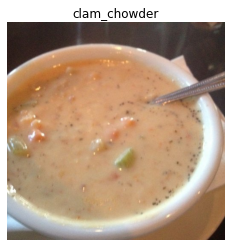

In [24]:
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

In [25]:
# Create Preprocessing functions for our data

In [26]:
def preprocess_img(image,label,img_shape=224):
  image=tf.image.resize(image,size=(img_shape,img_shape))   # resizing the image
  return tf.cast(image,dtype=tf.float32),label # changing the datatype of input tensor

In [27]:
preprocessed_img=preprocess_img(image,label)[0]
print(f'image before preprocessing:\n{image[:2]}...\nShape:{image.shape},...\Datatype:{image.dtype}')
print(f'image after preprocessing:\n{preprocessed_img[:2]}...\nShape:{preprocessed_img.shape},...\Datatype:{preprocessed_img.dtype}')

image before preprocessing:
[[[41 32 27]
  [43 34 29]
  [43 34 29]
  ...
  [53 50 41]
  [48 48 38]
  [45 45 35]]

 [[40 31 26]
  [43 34 29]
  [45 36 31]
  ...
  [46 43 34]
  [46 46 36]
  [49 49 39]]]...
Shape:(512, 512, 3),...\Datatype:<dtype: 'uint8'>
image after preprocessing:
[[[42.05612  33.05612  28.056124]
  [42.09694  33.09694  28.09694 ]
  [43.64796  34.21939  29.433674]
  ...
  [64.80089  55.586624 46.586624]
  [50.622417 46.69386  37.69386 ]
  [47.02044  47.02044  37.02044 ]]

 [[44.760204 35.760204 30.760204]
  [46.066326 37.066326 32.066326]
  [49.357147 39.928574 35.14286 ]
  ...
  [64.33646  56.78038  48.62224 ]
  [53.836746 49.908188 40.908188]
  [52.015156 50.224434 42.821342]]]...
Shape:(224, 224, 3),...\Datatype:<dtype: 'float32'>


In [28]:
# Batch and Prepare dataset

In [29]:
train_data=train_data.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)
#SHUFFLE TRAIN DATA AND TURN IT INTO BATCHES AND PREFETCH IT
train_data=train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data=test_data.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=32).prefetch(tf.data.AUTOTUNE)

In [30]:
train_data , test_data

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

In [31]:
# Create modelling callbacks

In [32]:
checkpoint_path='model_checkpoints/cp.ckpt'
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    verbose=0
)

In [33]:
# mixed precision training

In [34]:
# turn on mixed precision training

In [35]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Tesla K80, compute capability 3.7
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Tesla K80, compute capability 3.7
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [36]:
!nvidia-smi

Sun Aug 29 13:22:47 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    73W / 149W |    123MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [37]:
mixed_precision.global_policy()

<Policy "mixed_float16">

In [38]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [39]:
# Create base model

In [40]:
input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
inputs=layers.Input(shape=input_shape,name='input_layers')
x=base_model(inputs,training=False)
x=layers.GlobalAveragePooling2D()(x)
outputs=layers.Dense(len(class_names),activation='softmax',dtype=tf.float32,name='softmax_float32')(x)
model=tf.keras.Model(inputs,outputs)



16719872/16705208 [==============================] - 0s 0us/step


In [41]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layers (InputLayer)    [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
softmax_float32 (Dense)      (None, 101)               129381    
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [43]:
# checking layer dtype policies
for layer in model.layers:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

input_layers True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [44]:
for layer in model.layers[1].layers:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <Policy "mixed_float16">
block2a_expand_bn False flo

In [45]:
# fit the feature extraction models with callback

In [46]:
history_101_food_classes_feature_extract=model.fit(
    train_data,
    epochs=3,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.15*len(test_data)),
    callbacks=[model_checkpoint]
)

Epoch 1/3
2368/2368 [==============================] - 319s 116ms/step - loss: 1.8199 - accuracy: 0.5584 - val_loss: 1.2412 - val_accuracy: 0.6793
Epoch 2/3
2368/2368 [==============================] - 262s 110ms/step - loss: 1.2921 - accuracy: 0.6669 - val_loss: 1.1326 - val_accuracy: 0.7031
Epoch 3/3
2368/2368 [==============================] - 263s 110ms/step - loss: 1.1421 - accuracy: 0.7032 - val_loss: 1.0932 - val_accuracy: 0.7074


In [47]:
model_resuts_feature_extractor=model.evaluate(test_data)

790/790 [==============================] - 87s 109ms/step - loss: 1.0858 - accuracy: 0.7067


In [48]:
# Using fine tuning

In [49]:
base_model.trainable=True
for layer in base_model.layers[:-10]:
  layer.trainable=False

In [50]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [51]:
for layer in model.layers[1].layers:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <Policy "mixed_float16">
block2a_expand_bn False flo

In [52]:
len(model.trainable_variables)

12

In [53]:
earlystopping_callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [54]:
checkpoint_fine_tuning_path='model_checkpoint_fine_tuning/cp.ckpt'

In [55]:
model_checkpoint_fine_tuning=tf.keras.callbacks.ModelCheckpoint(
    checkpoint_fine_tuning_path,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True
)

In [56]:
# training the model with fine tuning 

In [57]:
#history_101_food_classes_fine_tuning=model.fit(
#    train_data,
  #  epochs=10,
 #   steps_per_epoch=len(train_data),
  #  validation_data=test_data,
  #  validation_steps=int(0.15*len(test_data)),
   # callbacks=[earlystopping_callback,model_checkpoint_fine_tuning]
#)

In [58]:
# This seems that model is overfitting and val_accuracy is not coming as expected. We will try to unfrozen some more layers as non-trainable

In [64]:
base_model.trainable=True


In [65]:
reduce_learning_rate_callback=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=2,verbose=1,min_lr=1e-7)

In [66]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [67]:
history_101_food_classes_fine_tuning=model.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.15*len(test_data)),
    callbacks=[earlystopping_callback,model_checkpoint_fine_tuning,reduce_learning_rate_callback]
)

Epoch 1/100
2368/2368 [==============================] - 1211s 498ms/step - loss: 0.4251 - accuracy: 0.8737 - val_loss: 1.0217 - val_accuracy: 0.7495
Epoch 2/100
2368/2368 [==============================] - 1168s 492ms/step - loss: 0.2461 - accuracy: 0.9274 - val_loss: 1.0800 - val_accuracy: 0.7635
Epoch 3/100
2368/2368 [==============================] - 1161s 489ms/step - loss: 0.1560 - accuracy: 0.9523 - val_loss: 1.2218 - val_accuracy: 0.7368

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
Epoch 4/100
2368/2368 [==============================] - 1156s 487ms/step - loss: 0.0321 - accuracy: 0.9926 - val_loss: 1.2401 - val_accuracy: 0.7789


In [68]:
model_resuts_fine_tuning=model.evaluate(test_data)

790/790 [==============================] - 80s 100ms/step - loss: 1.1990 - accuracy: 0.7730


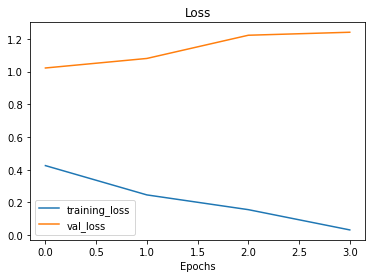

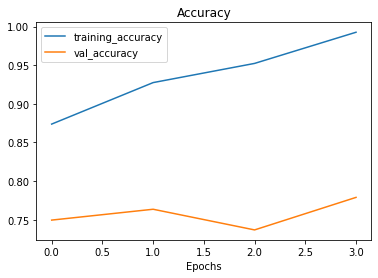

In [69]:
plot_loss_curves(history_101_food_classes_fine_tuning)

In [ ]:
mo